In [3]:
import san
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
start_date = '2023-01-01'
end_date = '2023-01-31'

ether_data = san.get(
            'ohlcv/ethereum',
            from_date=start_date,
            to_date=end_date,
            interval='10m'
        )

ether_data = ether_data.asfreq('10MIN')


In [32]:
ether_data['pctg_change'] = (ether_data['closePriceUsd']-ether_data['openPriceUsd'])/ether_data['openPriceUsd']*100
ether_data['change_flag'] = [0 if pctg<=0 else 1 for pctg in ether_data['pctg_change']]
ether_data

,openPriceUsd,closePriceUsd,highPriceUsd,lowPriceUsd,volume,marketcap,pctg_change,change_flag
datetime,,,,,,,,
2023-01-01 00:00:00+00:00,1196.605888,1196.600144,1196.605888,1196.600144,2.999633e+09,1.464326e+11,-0.000480,0
2023-01-01 00:10:00+00:00,1196.292408,1195.564957,1196.292408,1195.564957,2.990528e+09,1.463059e+11,-0.060809,0
2023-01-01 00:20:00+00:00,1195.692870,1196.570346,1196.570346,1195.692870,2.983566e+09,1.464289e+11,0.073386,1
2023-01-01 00:30:00+00:00,1196.644155,1194.938092,1196.644155,1194.938092,2.979986e+09,1.462292e+11,-0.142571,0
2023-01-01 00:40:00+00:00,1194.798863,1195.003537,1195.003537,1194.517512,2.983220e+09,1.462372e+11,0.017130,1
...,...,...,...,...,...,...,...,...
2023-01-31 23:10:00+00:00,1586.496718,1584.384961,1586.496718,1584.384961,6.601722e+09,1.938873e+11,-0.133108,0
2023-01-31 23:20:00+00:00,1585.336815,1584.996086,1585.663235,1584.996086,6.599981e+09,1.939621e+11,-0.021493,0
2023-01-31 23:30:00+00:00,1584.712984,1584.167268,1584.908368,1584.166631,6.582745e+09,1.938607e+11,-0.034436,0


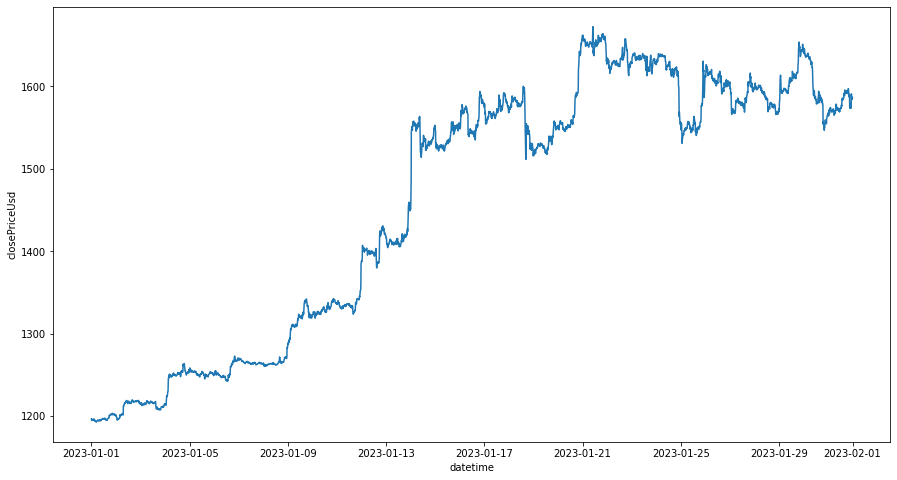

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=ether_data, x='datetime', y='closePriceUsd');


In [34]:
ether_data.corr()['change_flag'].sort_values()

openPriceUsd    -0.080759
highPriceUsd    -0.032668
lowPriceUsd     -0.021139
volume           0.003135
marketcap        0.020357
closePriceUsd    0.024177
pctg_change      0.737128
change_flag      1.000000
Name: change_flag, dtype: float64

In [35]:
import OpenBlender
from io import StringIO
import json


action = 'API_getObservationsFromDataset'

# ANCHOR: 'Bloomberg Tweet'

        
parameters = { 
    'token':'62c9df1a95162940572a5761emDw8S0NhoQKLhDSWAzwNzRFVbbm9c',
	'id_user':'62c9df1a95162940572a5761',
	'id_dataset':'5ea82c58951629637391885d' 
}
        

df = pd.read_json(StringIO(json.dumps(OpenBlender.call(action, parameters)['sample'])), convert_dates=False, convert_axes=False).sort_values('timestamp', ascending=False)
df.reset_index(drop=True, inplace=True)
df.head()

Task ID: '62c9e0ec0895fafb4a9d8d4b'.
Total estimated consumption: 545.02 processing units.
0.26 %
0.52 %
0.78 %
1.04 %
1.31 %
1.57 %
1.83 %
2.09 %
2.35 %
2.61 %
2.87 %
3.13 %
3.39 %
3.66 %
3.92 %
4.18 %
4.44 %
4.7 %
4.96 %
5.22 %
5.48 %
5.74 %
6.01 %
6.27 %
6.53 %
6.79 %
7.05 %
7.31 %
7.57 %
7.83 %
8.09 %
8.36 %
8.62 %
8.88 %
9.14 %
9.4 %
9.66 %
9.92 %
10.18 %
10.44 %
10.7 %
10.97 %
11.23 %
11.49 %
11.75 %
12.01 %
12.27 %
12.53 %
12.79 %
13.05 %
13.32 %
13.58 %
13.84 %
14.1 %
14.36 %
14.62 %
14.88 %
15.14 %
15.4 %
15.67 %
15.93 %
16.19 %
16.45 %
16.71 %
16.97 %
17.23 %
17.49 %
17.75 %
18.02 %
18.28 %
18.54 %
18.8 %
19.06 %
19.32 %
19.58 %
19.84 %
20.1 %
20.37 %
20.63 %
20.89 %
21.15 %
21.41 %
21.67 %
21.93 %
22.19 %
22.45 %
22.72 %
22.98 %
23.24 %
23.5 %
23.76 %
24.02 %
24.28 %
24.54 %
24.8 %
25.07 %
25.33 %
25.59 %
25.85 %
26.11 %
26.37 %
26.63 %
26.89 %
27.15 %
27.42 %
27.68 %
27.94 %
28.2 %
28.46 %
28.72 %
28.98 %
29.24 %
29.5 %
29.77 %
30.03 %
30.29 %
30.55 %
30.81 %
31.07 %
31.33 

,re_tweeter,links,author,text,hashtags,reply_count,associated_tweet,timestamp,mentions,author_id,retweet_count,type,id,favorite_count
0,,[https:\/\/t.co\/CxLmJlSwi1],Bloomberg,Billionaire Ken Griffin gave $130 million to 4...,,,,1657395781,,,,Tweet,1545856068391211008,
1,,[https:\/\/t.co\/p3GVLy65V1],Bloomberg,The race to replace Boris Johnson as UK prime ...,,,,1657394166,,,,Tweet,1545849294338641920,
2,,[https:\/\/t.co\/m836NxCpbt],Bloomberg,Hong Kong suspends its flight-ban system after...,,,,1657394105,,,,Tweet,1545849038309933056,
3,,[https:\/\/t.co\/r4SUBdMUQ3],Bloomberg,"A fire ripped through the Veranda House hotel,...",,,,1657393926,,,,Tweet,1545848283909734400,
4,,[https:\/\/t.co\/T8zl4GDktA],Bloomberg,Elon Musk dodged questions about his move to s...,,,,1657393443,,,,Tweet,1545846259960913920,


In [36]:
df.to_csv('bloomberg.csv')